# Supply Chain Projects

This dataset is about about supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries.

This notebook separates into:
1. Exploratory Data Analysis
2. Outlier Testing on Regression and Classification Problem

The method being used to handle outliers is log transform for both linear and classification model, and we want to see how it will affect the model. For Regression model, we use RMSE, MAE, and r2 scoring method using cross validation.

### *Importing  Initial Libraries*

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### *Importing Datasets*

In [95]:
df = pd.read_csv('Supply_Chain_Shipment_Pricing_Data.csv')
df = df.set_index('id')
df = df.sort_index(axis=0)
df.head()

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


### *Checking Dataset's Info and Missing Values*

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10324 entries, 1 to 86823
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   project code                  10324 non-null  object 
 1   pq #                          10324 non-null  object 
 2   po / so #                     10324 non-null  object 
 3   asn/dn #                      10324 non-null  object 
 4   country                       10324 non-null  object 
 5   managed by                    10324 non-null  object 
 6   fulfill via                   10324 non-null  object 
 7   vendor inco term              10324 non-null  object 
 8   shipment mode                 9964 non-null   object 
 9   pq first sent to client date  10324 non-null  object 
 10  po sent to vendor date        10324 non-null  object 
 11  scheduled delivery date       10324 non-null  object 
 12  delivered to client date      10324 non-null  object 
 13  d

In [97]:
miss = df.isnull().sum()
(miss/len(df))*100

project code                     0.000000
pq #                             0.000000
po / so #                        0.000000
asn/dn #                         0.000000
country                          0.000000
managed by                       0.000000
fulfill via                      0.000000
vendor inco term                 0.000000
shipment mode                    3.487021
pq first sent to client date     0.000000
po sent to vendor date           0.000000
scheduled delivery date          0.000000
delivered to client date         0.000000
delivery recorded date           0.000000
product group                    0.000000
sub classification               0.000000
vendor                           0.000000
item description                 0.000000
molecule/test type               0.000000
brand                            0.000000
dosage                          16.815188
dosage form                      0.000000
unit of measure (per pack)       0.000000
line item quantity               0

Number of missing values is less than 20%, and still manageable to handle. To simplify, we will just fill the missing values using 0

In [98]:
df = df.fillna(0)
df.isnull().sum().sum()

0

In [99]:
df.tail()

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/2014,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/2015,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392,Freight Included in Commodity Cost,134.03
86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",False,Weight Captured Separately,Freight Included in Commodity Cost,85.82


## Exploratory Data Analysis

### *Create Pie Chart for Shipment Mode*

In [100]:
df['shipment mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
0               360
Name: shipment mode, dtype: int64

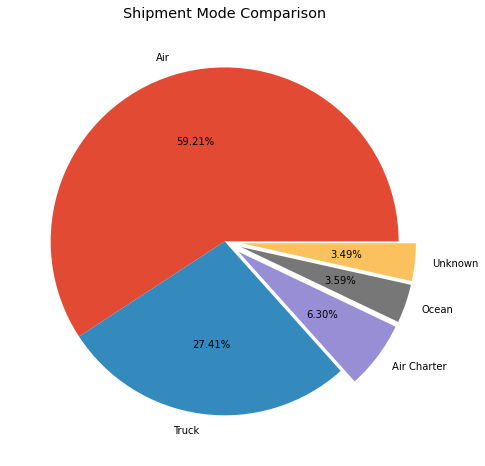

In [101]:
air = df.loc[df['shipment mode'] == 'Air'].count()[0]
truck = df.loc[df['shipment mode'] == 'Truck'].count()[0]
air_charter = df.loc[df['shipment mode'] == 'Air Charter'].count()[0]
ocean = df.loc[df['shipment mode'] == 'Ocean'].count()[0]
unknown = df.loc[df['shipment mode'] == 0].count()[0]

labels = ['Air','Truck','Air Charter','Ocean','Unknown']
explode = (0,0,.1,.1,.1)

plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.pie([air, truck, air_charter, ocean, unknown], labels = labels, autopct='%.2f%%', explode = explode)
plt.title('Shipment Mode Comparison')
plt.show()

The majority of the shipment is by Air

### Which Country Has the Largest  Number of Pack?

In [102]:
results = df.groupby('country').sum()
results['unit of measure (per pack)'].sort_values(ascending=False)

country
South Africa          126293
Côte d'Ivoire          96158
Nigeria                85590
Haiti                  67850
Mozambique             49722
Uganda                 48908
Vietnam                47566
Zambia                 47125
Tanzania               36660
Zimbabwe               36434
Rwanda                 31219
Congo, DRC             30445
Guyana                 23976
Ethiopia               13948
South Sudan             9481
Kenya                   8249
Burundi                 8031
Ghana                   5130
Namibia                 4780
Cameroon                4342
Botswana                3839
Dominican Republic      3697
Sudan                   2832
Afghanistan             2100
Swaziland               2032
Pakistan                1110
Lebanon                 1050
Mali                    1050
Guatemala                965
Angola                   810
Benin                    765
Malawi                   720
Libya                    420
Lesotho                  320
Liberi

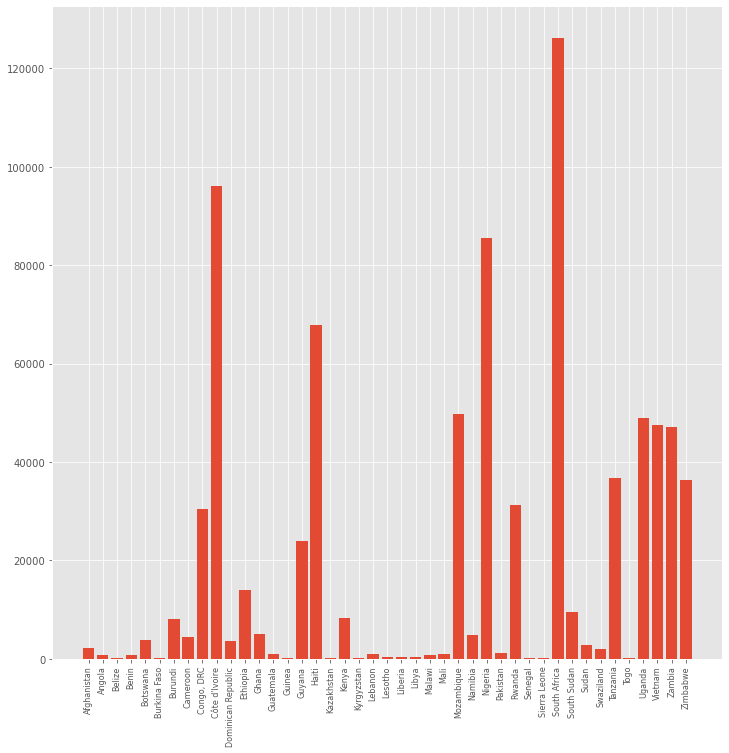

In [103]:
country = [c for c, data in df.groupby('country')]

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
plt.bar(country, results['unit of measure (per pack)'])
plt.xticks(country, rotation='vertical', size = 8)
plt.show()

As we can see, South Africa is the country with the largest number of packs distributed, with Congo comes second. Next is we want to see the country with the least number of pack.

### Country with Least Number of Pack

In [104]:
results['unit of measure (per pack)'].sort_values(ascending=False).tail(2)
least = ['Burkina Faso', 'Kyrgyzstan']

df_least = df.loc[df['country'].isin(least)]

In [105]:
df_least.groupby(['country','scheduled delivery date','item description', 'shipment mode']).sum()

unit of measure (per pack)  \
country      scheduled delivery date item description                                   shipment mode                               
Burkina Faso 11-Jul-15               Lamivudine 300mg, tablets, 30 Tabs                 Air                                    30   
             4-Aug-15                Ritonavir 100mg [Norvir], film coated tablets, ... Air                                    60   
Kyrgyzstan   14-Jun-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                                    40   
             19-Sep-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                                    40   

                                                                                                       line item quantity  \
country      scheduled delivery date item description                                   shipment mode                       
Burkina Faso 11-Jul-15               Lamivudine 300mg, tablets, 30 Tabs                 Air                           140   
             4-Aug-15                Ritonavir 100mg [Norvir], film coated tablets, ... Air                            25   
Kyrgyzstan   14-Jun-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                           500   
             19-Sep-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                           500   

                                                                                                       line item value  \
country      scheduled delivery date item description                                   shipment mode                    
Burkina Faso 11-Jul-15               Lamivudine 300mg, tablets, 30 Tabs                 Air                     280.00   
             4-Aug-15                Ritonavir 100mg [Norvir], film coated tablets, ... Air                     171.25   
Kyrgyzstan   14-Jun-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                   39500.00   
             19-Sep-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                   39500.00   

                                                                                                       pack price  \
country      scheduled delivery date item description                                   shipment mode               
Burkina Faso 11-Jul-15               Lamivudine 300mg, tablets, 30 Tabs                 Air                  2.00   
             4-Aug-15                Ritonavir 100mg [Norvir], film coated tablets, ... Air                  6.85   
Kyrgyzstan   14-Jun-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                 79.00   
             19-Sep-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                 79.00   

                                                                                                       unit price  \
country      scheduled delivery date item description                                   shipment mode               
Burkina Faso 11-Jul-15               Lamivudine 300mg, tablets, 30 Tabs                 Air                  0.07   
             4-Aug-15                Ritonavir 100mg [Norvir], film coated tablets, ... Air                  0.11   
Kyrgyzstan   14-Jun-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                  1.98   
             19-Sep-08               HIV 1/2, DoubleCheck II Kit, 40 Tests              Air                  1.98   

                                                                                                       first line designation  \
country      scheduled delivery date item description                                   shipment mode                           
Burkina Faso 11-Jul-15               Lamivudine 300mg, tablets, 30 Tabs                 Air                                 1   
             4-Aug-15      

Scheduled delivery date of Kyrgyzstan is only on 14 June 2008 and 19 September 2008, this may lead to an assumption that the country is having economic crisis, where unemployment in Kyrgyzstan is remain low betwwen 2008-2011.
On the other hand, Burkina Faso just started on 2015. Therefore there are not many records of the country

### South Africa Analysis

#### Medicine Sent to South Africa

In [106]:
df_sa = df.loc[df['country'] == 'South Africa']
df_sa.groupby(['country','scheduled delivery date','item description', 'shipment mode']).sum()

unit of measure (per pack)  \
country      scheduled delivery date item description                                   shipment mode                               
South Africa 1-Apr-09                Emtricitabine/Tenofovir Disoproxil Fumarate 200... Air                                    30   
                                     Lamivudine 10mg/ml [Epivir], oral solution, Bot... Air                                   240   
                                     Lamivudine 150mg [Epivir], tablets, 60 Tabs        Air                                    60   
                                     Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral ... Air                                   300   
                                     Ritonavir 80mg/ml [Norvir], oral solution, cool... Air                                    90   
                                     Stavudine 20mg [Zerit], capsules, 60 Caps          Air                                    60   
                                     Tenofovir Disoproxil Fumarate 300mg [Viread], t... Air                                    30   
                                     Zidovudine 10mg/ml [Retrovir], oral solution, B... Air                                   200   
                                     Zidovudine 300mg [Retrovir], tablets, 60 Tabs      Air                                    60   
             1-Apr-10                Abacavir 300mg [Ziagen], tablets, Blister 6 x 1... Truck                                  60   
                                     Emtricitabine/Tenofovir Disoproxil Fumarate 200... Truck                                  30   
                                     Stavudine 30mg, capsules, 60 Caps                  Truck                                  60   
                                     Tenofovir Disoproxil Fumarate 300mg [Viread], t... Truck                                  30   
                                     Zidovudine 300mg [Retrovir], tablets, 60 Tabs      Truck                                  60   
             1-Dec-11                Efavirenz 600mg, tablets, 30 Tabs                  Ocean                                  90   
             1-Feb-11                Efavirenz 200mg, capsule, 90 Caps                  Ocean                                 270   
                                     Efavirenz 50mg, capsule, 30 Caps                   Ocean                                  30   
                                     Efavirenz 600mg, tablets, 30 Tabs                  Ocean                                 210   
             1-Jul-10                Abacavir 20mg/ml [Ziagen], oral solution, Bottl... Air                                   240   
             1-Jun-10                Efavirenz 600mg, tablets, 30 Tabs                  Air                                   150   
             1-Sep-10                Tenofovir Disoproxil Fumarate 300mg, tablets, 3... Air                                    90   
             10-Dec-14               Abacavir 20mg/ml, oral solution, Bottle, 240 ml    Truck                                 240   
                                     Abacavir 300mg, tablets, 60 Tabs                   Truck                                  60   
                                     Didanosine 250mg, delayed-release capsules, 30 ... Truck                                  30   
                                     Didanosine 400mg, delayed-release capsules, 30 ... Truck                                  30   
                                     Efavirenz 200mg, capsule, 90 Caps                  Truck                                  90   
                                     Efavirenz 50mg, capsule, 30 Caps                   Truck                                  30   
                                     Efavirenz 600mg, tablets, 30 Tabs                  Truck                                  30   
                                     Emtricitabine/Tenofovir Disoproxil Fumarate 200... Truck                    

In [107]:
df_sa['medicine'] = df['item description'].apply(lambda x:x.split(',')[0])
df_sa.groupby(['country','scheduled delivery date','medicine', 'shipment mode']).sum()

unit of measure (per pack)  \
country      scheduled delivery date medicine                                           shipment mode                               
South Africa 1-Apr-09                Emtricitabine/Tenofovir Disoproxil Fumarate 200... Air                                    30   
                                     Lamivudine 10mg/ml [Epivir]                        Air                                   240   
                                     Lamivudine 150mg [Epivir]                          Air                                    60   
                                     Lopinavir/Ritonavir 80/20mg/ml [Kaletra]           Air                                   300   
                                     Ritonavir 80mg/ml [Norvir]                         Air                                    90   
                                     Stavudine 20mg [Zerit]                             Air                                    60   
                                     Tenofovir Disoproxil Fumarate 300mg [Viread]       Air                                    30   
                                     Zidovudine 10mg/ml [Retrovir]                      Air                                   200   
                                     Zidovudine 300mg [Retrovir]                        Air                                    60   
             1-Apr-10                Abacavir 300mg [Ziagen]                            Truck                                  60   
                                     Emtricitabine/Tenofovir Disoproxil Fumarate 200... Truck                                  30   
                                     Stavudine 30mg                                     Truck                                  60   
                                     Tenofovir Disoproxil Fumarate 300mg [Viread]       Truck                                  30   
                                     Zidovudine 300mg [Retrovir]                        Truck                                  60   
             1-Dec-11                Efavirenz 600mg                                    Ocean                                  90   
             1-Feb-11                Efavirenz 200mg                                    Ocean                                 270   
                                     Efavirenz 50mg                                     Ocean                                  30   
                                     Efavirenz 600mg                                    Ocean                                 210   
             1-Jul-10                Abacavir 20mg/ml [Ziagen]                          Air                                   240   
             1-Jun-10                Efavirenz 600mg                                    Air                                   150   
             1-Sep-10                Tenofovir Disoproxil Fumarate 300mg                Air                                    90   
             10-Dec-14               Abacavir 20mg/ml                                   Truck                                 240   
                                     Abacavir 300mg                                     Truck                                  60   
                                     Didanosine 250mg                                   Truck                                  30   
                                     Didanosine 400mg                                   Truck                                  30   
                                     Efavirenz 200mg                                    Truck                                  90   
                                     Efavirenz 50mg                                     Truck                                  30   
                                     Efavirenz 600mg                                    Truck                                  30   
                                     Emtricitabine/Tenofovir Disoproxil Fumarate 200... Truck                    

In [108]:
df_sa_ship = df_sa[['medicine', 'shipment mode', 'unit of measure (per pack)']]
df_sa_ship.head()

,medicine,shipment mode,unit of measure (per pack)
id,,,
262,Zidovudine 10mg/ml [Retrovir],0,200
343,Stavudine 1mg/ml [Zerit],0,200
422,Saquinavir 200mg [Invirase],Truck,270
423,Stavudine 1mg/ml [Zerit],Truck,200
459,Didanosine 25mg [Videx],0,60


In [109]:
df_sa_ship['medicine'] = df_sa_ship['medicine'].apply(lambda x : x.split(' ')[0])
df_sa_ship.groupby('medicine').sum()

,unit of measure (per pack)
medicine,
Abacavir,16440
Atazanavir,720
Darunavir,1320
Didanosine,4280
Efavirenz,11520
Efavirenz/Emtricitabine/Tenofovir,120
Emtricitabine/Tenofovir,1470
Etravirine,2040
Lamivudine,24720


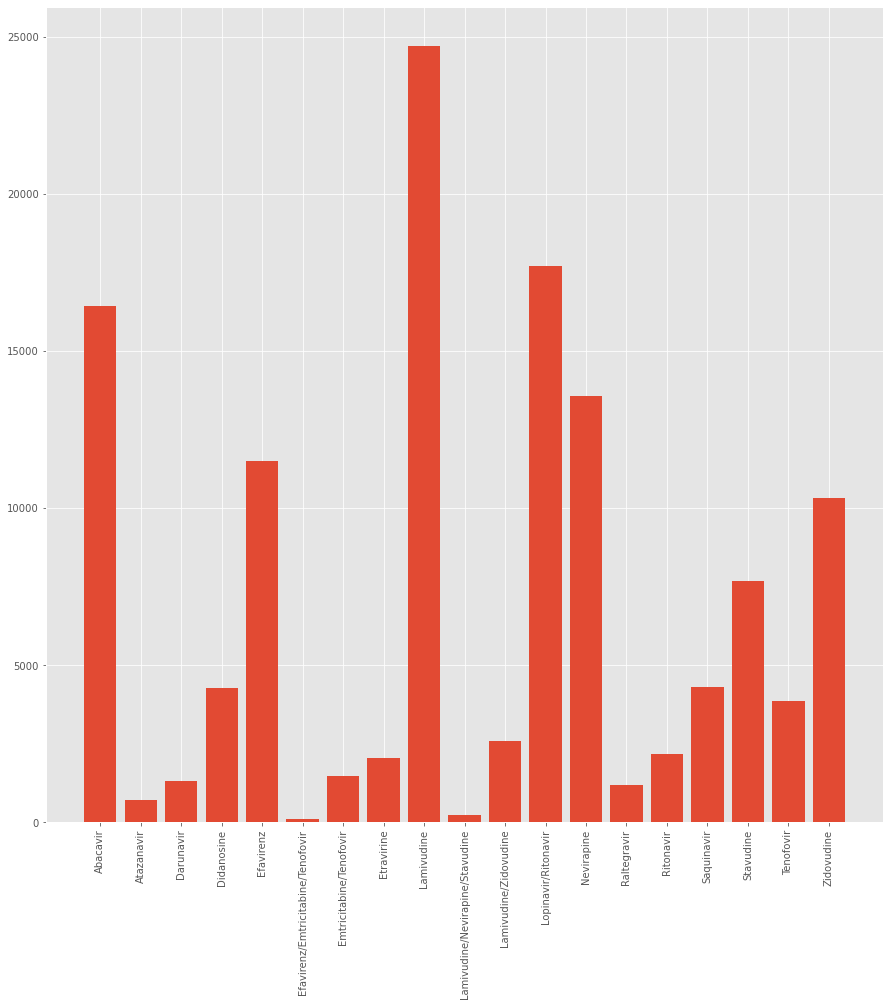

In [110]:
index = [med for med, dt in df_sa_ship.groupby('medicine')]
res_ship = df_sa_ship.groupby('medicine').sum()

plt.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.bar(index, res_ship['unit of measure (per pack)'])
plt.xticks(index, rotation='vertical', size = 10)
plt.show()

Lamivudine and Lopinavir/Ritonavir is the most commong type of HIV medicine that is being sent into South Africa. With Efavirenz/Emtricitabine/Tenofovir is the least combination being sent.  

#### Distribution Method used to South Africa

In [111]:
df_sa_ship['shipment mode'].unique()

array([0, 'Truck', 'Air', 'Ocean'], dtype=object)

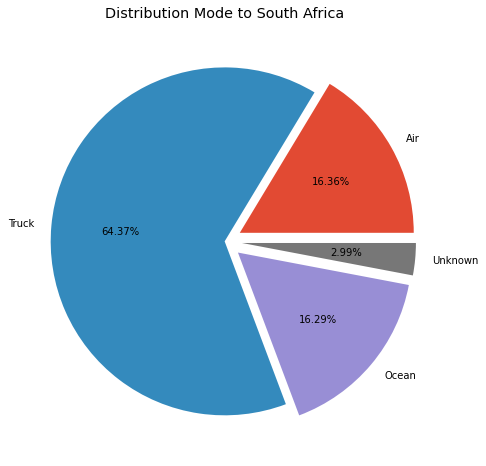

In [112]:
air = df_sa_ship.loc[df_sa_ship['shipment mode'] == 'Air'].count()[0]
truck = df_sa_ship.loc[df_sa_ship['shipment mode'] == 'Truck'].count()[0]
ocean = df_sa_ship.loc[df_sa_ship['shipment mode'] == 'Ocean'].count()[0]
unknown = df_sa_ship.loc[df_sa_ship['shipment mode'] == 0].count()[0]

labels = ['Air','Truck','Ocean','Unknown']
explode = (.1,0,.1,.1)

plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.pie([air, truck, ocean,  unknown], labels = labels, autopct='%.2f%%', explode = explode)
plt.title('Distribution Mode to South Africa')
plt.show()

Comapres to the majority of the data that we have where Air distribution method is more favorable, South Africa's distribution method is dominated by Truck rather that Air.

#### Types of Item Distributed Using Certain Methods

In [113]:
df_sa_0 = df_sa_ship.loc[df_sa_ship['shipment mode']==0]
df_sa_truck = df_sa_ship.loc[df_sa_ship['shipment mode']=='Truck']
df_sa_air = df_sa_ship.loc[df_sa_ship['shipment mode']=='Air']
df_sa_ocean = df_sa_ship.loc[df_sa_ship['shipment mode']=='Ocean']

In [114]:
res0 = df_sa_0.groupby('medicine').sum()
resa = df_sa_air.groupby('medicine').sum()
rest = df_sa_truck.groupby('medicine').sum()
reso = df_sa_ocean.groupby('medicine').sum()

index_0 = [a for a, b in df_sa_0.groupby('medicine')]
index_air = [c for c, d in df_sa_air.groupby('medicine')]
index_truck = [e for e, f in df_sa_truck.groupby('medicine')]
index_ocean = [g for g, h in df_sa_ocean.groupby('medicine')]

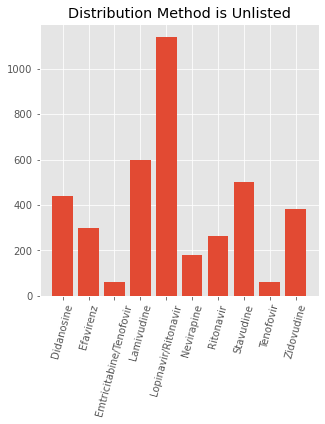

In [115]:
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
plt.bar(index_0, res0['unit of measure (per pack)'])
plt.title('Distribution Method is Unlisted')
plt.xticks(index_0, rotation=75, size = 10)
plt.show()

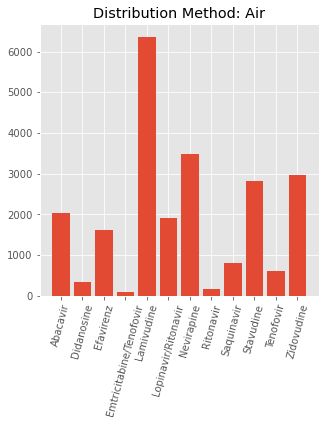

In [116]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
plt.bar(index_air, resa['unit of measure (per pack)'])
plt.title('Distribution Method: Air')
plt.xticks(index_air, rotation=75, size = 10)
plt.show()

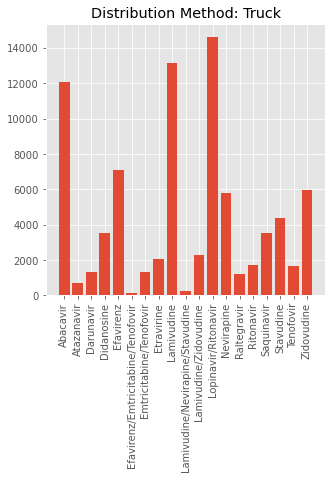

In [117]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
plt.bar(index_truck, rest['unit of measure (per pack)'])
plt.title('Distribution Method: Truck')
plt.xticks(index_truck, rotation='vertical', size = 10)
plt.show()

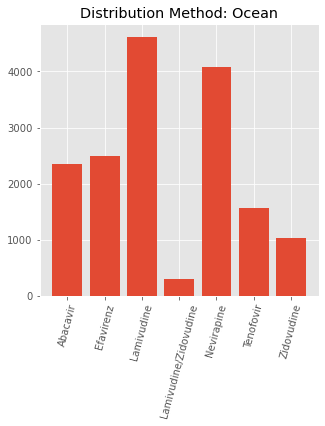

In [118]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
plt.bar(index_ocean, reso['unit of measure (per pack)'])
plt.title('Distribution Method: Ocean')
plt.xticks(index_ocean, rotation=75, size = 10)
plt.show()

The variation of medicine that is sent using Trucks is obviously more variative compares than other. But, for both ocean and air method, there are some gaps of variety in terms of medicine being sent.

In [119]:
df.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0


In [120]:
df_sa['medicine'] = df_sa['medicine'].apply(lambda x : x.split(' ')[0])

In [121]:
df_sa.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),medicine
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
262,116-ZA-T01,Pre-PQ Process,SCMS-14050,ASN-1251,South Africa,PMO - US,Direct Drop,DDP,0,Pre-PQ Process,11/12/2007,29-Jan-08,29-Jan-08,29-Jan-08,ARV,Pediatric,"JSI R&T INSTITUTE, INC.","Zidovudine 10mg/ml [Retrovir], oral solution, ...",Zidovudine,Retrovir,10mg/ml,Oral solution,200,40,317.6,7.94,0.04,GSK Mississauga (Canada),True,Weight Captured Separately,Freight Included in Commodity Cost,0.51,Zidovudine
343,116-ZA-T01,Pre-PQ Process,SCMS-16600,ASN-1520,South Africa,PMO - US,Direct Drop,DDP,0,Pre-PQ Process,1/4/2008,21-Jan-08,4-Jan-08,4-Jan-08,ARV,Pediatric,"JSI R&T INSTITUTE, INC.","Stavudine 1mg/ml [Zerit], powder for oral solu...",Stavudine,Zerit,1mg/ml,Powder for oral solution,200,200,340.0,1.70,0.01,"BMS Meymac, France",True,Weight Captured Separately,Freight Included in Commodity Cost,0.54,Stavudine


#### Number of Medicine Shipped on Each Method

In [122]:
df_sa['managed by'].value_counts()

PMO - US                     1349
South Africa Field Office      57
Name: managed by, dtype: int64

In [123]:
df_sa['medicine'].unique()

array(['Zidovudine', 'Stavudine', 'Saquinavir', 'Didanosine', 'Abacavir',
       'Nevirapine', 'Tenofovir', 'Lopinavir/Ritonavir', 'Efavirenz',
       'Lamivudine', 'Emtricitabine/Tenofovir', 'Ritonavir', 'Darunavir',
       'Lamivudine/Zidovudine', 'Raltegravir',
       'Efavirenz/Emtricitabine/Tenofovir', 'Etravirine', 'Atazanavir',
       'Lamivudine/Nevirapine/Stavudine'], dtype=object)

<Figure size 1080x1080 with 0 Axes>

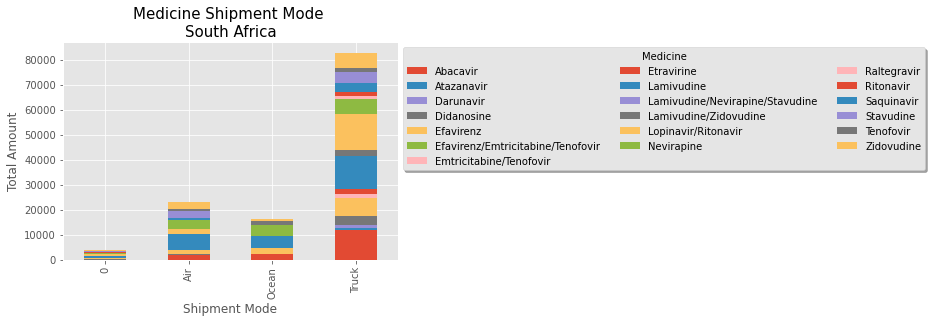

In [124]:
plt.style.use('ggplot')
plt.figure(figsize=(15,15))
df_sa.groupby(['shipment mode', 'medicine'])['unit of measure (per pack)'].sum().sort_values(ascending = False).unstack().plot(kind='bar', stacked=True)
plt.title('Medicine Shipment Mode \nSouth Africa', fontsize=15)
plt.xlabel('Shipment Mode', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), loc='best', shadow=True, ncol=3, title='Medicine')
plt.show()

#### Number of Items Shipped on Every Method Every Year

In [125]:
df['scheduled year'] = df['scheduled delivery date'].apply(lambda x : x.split('-')[2])
df.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),scheduled year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0,06
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0,06


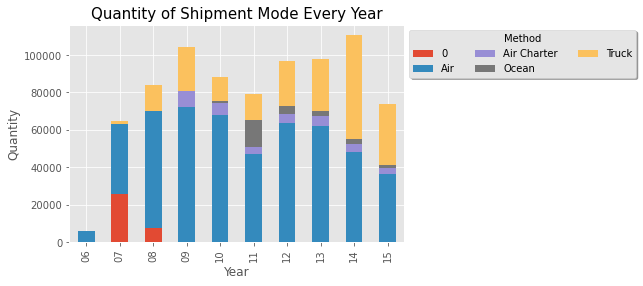

In [126]:
df.groupby(['scheduled year', 'shipment mode'])['unit of measure (per pack)'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('Quantity of Shipment Mode Every Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), loc='best', shadow=True, ncol=3, title='Method')
plt.show()

#### Types of Sub Classification Distributed Throughout a Years

In [127]:
df['sub classification'].unique()

array(['HIV test', 'Pediatric', 'Adult', 'HIV test - Ancillary', 'ACT',
       'Malaria'], dtype=object)

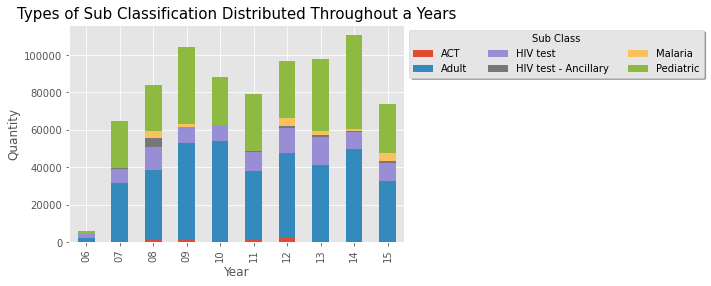

In [128]:
df.groupby(['scheduled year', 'sub classification'])['unit of measure (per pack)'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('Types of Sub Classification Distributed Throughout a Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), loc='best', shadow=True, ncol=3, title='Sub Class')
plt.show()

In [129]:
df['dosage form'].unique()

array(['Test kit', 'Oral suspension', 'Tablet', 'Capsule',
       'Oral solution', 'Tablet - FDC', 'Powder for oral solution',
       'Test kit - Ancillary', 'Chewable/dispersible tablet',
       'Delayed-release capsules - blister', 'Tablet - blister',
       'Tablet - FDC + blister', 'Tablet - FDC + co-blister', 'Injection',
       'Delayed-release capsules', 'Chewable/dispersible tablet - FDC',
       'Oral powder'], dtype=object)

## Outlier Testing on Regression and Classification Problem

### Data Modelling and Scoring for Regression (no Outlier Handling)

In [130]:
df['scheduled month'] = df['scheduled delivery date'].apply(lambda x : x.split('-')[1])
df['scheduled date'] = df['scheduled delivery date'].apply(lambda x : x.split('-')[0]).astype('int')
df.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),scheduled year,scheduled month,scheduled date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0,06,Jun,2
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0,06,Nov,14


In [131]:
df['scheduled year'] = df['scheduled year'].astype('int')
df['arrived year'] = df['delivered to client date'].apply(lambda x : x.split('-')[2]).astype('int')
df['arrived month'] = df['delivered to client date'].apply(lambda x : x.split('-')[1])
df['arrived date'] = df['delivered to client date'].apply(lambda x : x.split('-')[0]).astype('int')
df.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),scheduled year,scheduled month,scheduled date,arrived year,arrived month,arrived date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0,6,Jun,2,6,Jun,2
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0,6,Nov,14,6,Nov,14


In [132]:
df['arrived month'].unique()

array(['Jun', 'Nov', 'Aug', 'Sep', 'Jan', 'Dec', 'Feb', 'Mar', 'May',
       'Oct', 'Apr', 'Jul'], dtype=object)

In [133]:
month_map = {'Jun':6, 'Nov':11, 'Aug':8, 'Sep':9, 'Jan':1, 'Dec':12, 'Feb':2, 'Mar':3, 'May':5,
       'Oct':10, 'Apr':4, 'Jul':7}
df['arrived month'] = df['arrived month'].replace(month_map)
df['scheduled month'] = df['scheduled month'].replace(month_map)
df.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),scheduled year,scheduled month,scheduled date,arrived year,arrived month,arrived date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0,6,6,2,6,6,2
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0,6,11,14,6,11,14


In [134]:
df['duration'] = (df['arrived date'] - df['scheduled date']) + ((df['arrived month'] - df['scheduled month'])*30) + ((df['arrived year'] - df['scheduled year'])*365)
df.head(2)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),scheduled year,scheduled month,scheduled date,arrived year,arrived month,arrived date,duration
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0,6,6,2,6,6,2,0
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0,6,11,14,6,11,14,0


In [135]:
val_data = df[['country', 'shipment mode', 'sub classification', 'unit of measure (per pack)', 'line item quantity', 'duration']]

In [136]:
val_data.dtypes

country                       object
shipment mode                 object
sub classification            object
unit of measure (per pack)     int64
line item quantity             int64
duration                       int64
dtype: object

In [137]:
val_data.shape

(10324, 6)

In [138]:
val_data = pd.get_dummies(val_data)
val_data.shape

(10324, 57)

In [139]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [171]:
X = val_data.drop('duration', axis=1)
y = val_data['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

### RMSE and MAE

In [159]:
lgreg = LinearRegression()
lgreg.fit(X_train, y_train)
y_pred = lgreg.predict(X_test)
print('Linear Regression RMSE: ',rmse(y_test, y_pred))
print('Linear Regression MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('SVR RMSE: ',rmse(y_test, y_pred))
print('SVR MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print('Decision Tree RMSE: ',rmse(y_test, y_pred))
print('Decision Tree MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Random Forest RMSE: ',rmse(y_test, y_pred))
print('Random Forest MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGB RMSE: ',rmse(y_test, y_pred))
print('XGB MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print('Gradien Boosting RMSE: ',rmse(y_test, y_pred))
print('Gradien Boosting MAE: ',mean_absolute_error(y_test, y_pred))

Linear Regression RMSE:  26.31933673901272
Linear Regression MAE:  13.75285543849118
--------------------------------------------------
SVR RMSE:  27.70024939558155
SVR MAE:  11.137979288114341
--------------------------------------------------
Decision Tree RMSE:  33.017529779833104
Decision Tree MAE:  15.526182635006734
--------------------------------------------------
Random Forest RMSE:  27.61292878540952
Random Forest MAE:  13.389262992314833
--------------------------------------------------
XGB RMSE:  25.587514757620003
XGB MAE:  12.764303120947199
--------------------------------------------------
Gradien Boosting RMSE:  24.752592317962517
Gradien Boosting MAE:  12.170211818203938


### Cross Val Score

In [172]:
print('Linear Regression Cross Val: ', cross_val_score(lgreg, X_train, y_train, scoring='r2', cv=10).mean())
print('SVR Cross Val: ', cross_val_score(svr, X_train, y_train, scoring='r2', cv=10).mean())
print('Decision Tree Regressor Cross Val: ', cross_val_score(dtr, X_train, y_train, scoring='r2', cv=10).mean())
print('Random Forest Regressor Cross Val: ', cross_val_score(rfr, X_train, y_train, scoring='r2', cv=10).mean())
print('XGB Regressor Cross Val: ', cross_val_score(xgb, X_train, y_train, scoring='r2', cv=10).mean())
print('Grad. Boosting Regressor Cross Val: ', cross_val_score(gbr, X_train, y_train, scoring='r2', cv=10).mean())

Linear Regression Cross Val:  0.06255846348066843
SVR Cross Val:  -0.04843690054528556
Decision Tree Regressor Cross Val:  -0.38174040125192077
Random Forest Regressor Cross Val:  0.054464305584440285
XGB Regressor Cross Val:  0.125003431454707
Grad. Boosting Regressor Cross Val:  0.18059566228039794


The low cross validation score is pretty inaccurate because we still have so many outliers in the data, in the next step we're going to handle some of the outliers and see how the cross validation score may improve.

## Data Modelling and Model Validation for Regression (Outlier Handling)

In [173]:
val_data_out = df[['country', 'shipment mode', 'sub classification', 'unit of measure (per pack)', 'line item quantity', 'duration']]
val_data_out.head(2)

,country,shipment mode,sub classification,unit of measure (per pack),line item quantity,duration
id,,,,,,
1,Côte d'Ivoire,Air,HIV test,30,19,0
3,Vietnam,Air,Pediatric,240,1000,0


<AxesSubplot:>

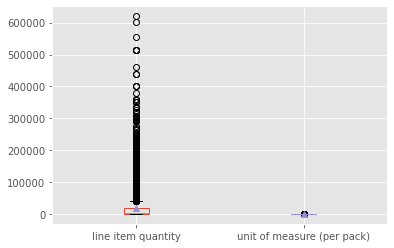

In [174]:
val_data_out[['line item quantity', 'unit of measure (per pack)']].plot(kind='box', showmeans=True)

Line item quantity has a lot of outliers that might resulting in prediction. There are several outliers in the unit of measure also, and below we can see the skewness of the data, and we are going to reduce it with log transform

In [175]:
print(val_data_out['line item quantity'].skew())
print(val_data_out['unit of measure (per pack)'].skew())

5.038314698810931
4.302502486751928


In [176]:
val_data_out["Log_Line item qty"] = val_data_out["line item quantity"].map(lambda i: np.log(i) if i > 0 else 0)
val_data_out["Log_Unit of measure"] = val_data_out["unit of measure (per pack)"].map(lambda i: np.log(i) if i > 0 else 0)
print(val_data_out['Log_Line item qty'].skew())
print(val_data_out['Log_Unit of measure'].skew())

-0.5299029003052065
-0.9938339105996856


<AxesSubplot:>

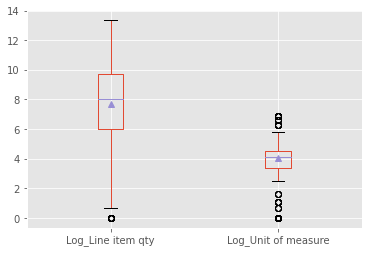

In [177]:
val_data_out[['Log_Line item qty','Log_Unit of measure']].plot(kind='box', showmeans=True)

In [178]:
val_data_out = val_data_out.drop(['line item quantity', 'unit of measure (per pack)'], axis=1)
val_data_out.head(2)

,country,shipment mode,sub classification,duration,Log_Line item qty,Log_Unit of measure
id,,,,,,
1,Côte d'Ivoire,Air,HIV test,0,2.944439,3.401197
3,Vietnam,Air,Pediatric,0,6.907755,5.480639


In [179]:
val_data_out = pd.get_dummies(val_data_out)

X = val_data_out.drop('duration', axis=1)
y = val_data_out['duration']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

### RMSE and MAE

In [181]:
lgreg = LinearRegression()
lgreg.fit(X_train, y_train)
y_pred = lgreg.predict(X_test)
print('Linear Regression RMSE: ',rmse(y_test, y_pred))
print('Linear Regression MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('SVR RMSE: ',rmse(y_test, y_pred))
print('SVR MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print('Decision Tree RMSE: ',rmse(y_test, y_pred))
print('Decision Tree MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Random Forest RMSE: ',rmse(y_test, y_pred))
print('Random Forest MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGB RMSE: ',rmse(y_test, y_pred))
print('XGB MAE: ',mean_absolute_error(y_test, y_pred))
print('-'*50)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print('Gradien Boosting RMSE: ',rmse(y_test, y_pred))
print('Gradien Boosting MAE: ',mean_absolute_error(y_test, y_pred))

Linear Regression RMSE:  26.87656784560461
Linear Regression MAE:  13.846571892170537
--------------------------------------------------
SVR RMSE:  28.025972122412057
SVR MAE:  11.042448989164326
--------------------------------------------------
Decision Tree RMSE:  32.49712573964329
Decision Tree MAE:  15.22032158078264
--------------------------------------------------
Random Forest RMSE:  27.535470062879295
Random Forest MAE:  13.248057476328244
--------------------------------------------------
XGB RMSE:  26.005955429602004
XGB MAE:  12.801258459335417
--------------------------------------------------
Gradien Boosting RMSE:  25.412988458298692
Gradien Boosting MAE:  12.596563021412413


### Cross Validation

In [182]:
print('Linear Regression Cross Val: ', cross_val_score(lgreg, X_train, y_train, scoring='r2', cv=10).mean())
print('SVR Cross Val: ', cross_val_score(svr, X_train, y_train, scoring='r2', cv=10).mean())
print('Decision Tree Regressor Cross Val: ', cross_val_score(dtr, X_train, y_train, scoring='r2', cv=10).mean())
print('Random Forest Regressor Cross Val: ', cross_val_score(rfr, X_train, y_train, scoring='r2', cv=10).mean())
print('XGB Regressor Cross Val: ', cross_val_score(xgb, X_train, y_train, scoring='r2', cv=10).mean())
print('Grad. Boosting Regressor Cross Val: ', cross_val_score(gbr, X_train, y_train, scoring='r2', cv=10).mean())

Linear Regression Cross Val:  -4.1652082994805115e+18
SVR Cross Val:  -0.0306529821534687
Decision Tree Regressor Cross Val:  -0.4003486935812555
Random Forest Regressor Cross Val:  0.05290875093420925
XGB Regressor Cross Val:  0.12616609687836577
Grad. Boosting Regressor Cross Val:  0.18118241401990223


As We can see, models like Linear Regression is suffering after log transform and having a lot of changes fro 0.06 all the way down to -4.8 cross val score. While other model is having slight improvement in the cross val score such as Gradient Boosting, and SVR that have a slight raise in cross validation score. This model cannot be the valid prediction to predict the exact date or duration of the delivery because of the lack features and documentation that we have, this model just intended to show how important outlier handling in the datasets.

## Data Modelling and Scoring for Classification (no Outlier Handling)

In [205]:
data = df[['country', 'shipment mode', 'sub classification', 'unit of measure (per pack)', 'line item quantity', 'duration']]
clas_data = data.copy()
clas_data.head(2)

,country,shipment mode,sub classification,unit of measure (per pack),line item quantity,duration
id,,,,,,
1,Côte d'Ivoire,Air,HIV test,30,19,0
3,Vietnam,Air,Pediatric,240,1000,0


In [206]:
clas_data['late'] = clas_data['duration'].apply(lambda x : 1 if x<0 else 0)
clas_data.late.value_counts()

0    7511
1    2813
Name: late, dtype: int64

In [207]:
clas_data = pd.get_dummies(clas_data)

In [208]:
clas_data = clas_data.drop('duration', axis=1)

In [209]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

accuracy = []

X = clas_data.drop('late', axis=1)
y = clas_data['late']
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits = 10, random_state = 0)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    xgb.fit(X1_train, y1_train)
    y_pred = xgb.predict(X1_test)
    score = accuracy_score(y_pred, y1_test)
    accuracy.append(score)

print(accuracy)

[13:11:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:11:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [210]:
np.array(accuracy).mean()

0.7707215193198106

## Data Modelling and Scoring for Classification (Outlier Handling)

In [211]:
clas_data_out = data.copy()

In [212]:
clas_data_out["Log_Line item qty"] = clas_data_out["line item quantity"].map(lambda i: np.log(i) if i > 0 else 0)
clas_data_out["Log_Unit of measure"] = clas_data_out["unit of measure (per pack)"].map(lambda i: np.log(i) if i > 0 else 0)
clas_data_out.head(2)

,country,shipment mode,sub classification,unit of measure (per pack),line item quantity,duration,Log_Line item qty,Log_Unit of measure
id,,,,,,,,
1,Côte d'Ivoire,Air,HIV test,30,19,0,2.944439,3.401197
3,Vietnam,Air,Pediatric,240,1000,0,6.907755,5.480639


In [213]:
clas_data_out['late'] = clas_data_out['duration'].apply(lambda x : 1 if x<0 else 0)
clas_data_out = clas_data_out.drop('duration', axis=1)

In [214]:
clas_data_out = pd.get_dummies(clas_data_out)

In [216]:
accuracy1 = []

X = clas_data_out.drop('late', axis=1)
y = clas_data_out['late']
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits = 10, random_state = 0)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    xgb.fit(X1_train, y1_train)
    y_pred = xgb.predict(X1_test)
    score = accuracy_score(y_pred, y1_test)
    accuracy1.append(score)

print(accuracy1)

[13:13:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [217]:
print(np.array(accuracy1).mean())

0.7707215193198106


The output for the classification method is still the same with around 77% accuracy in predicting whether the delivery late or not. Even though there are only slight changes in accuracy in classification model and slight improvement in cross val. score, RMSE, MAE n regression model, we would still recommend to do the outlier handling to reduce the skewness and to normalize the data.

#### Again, Need to remember, this model is not  on every supply chain problem and not fully accurate, there are still lack of features to support the models, and a lot feature engineering to be done. This model only intended to show how outlier handling affect the model.